In [ ]:
import RPi.GPIO as GPIO
import time

GPIO.setmode(GPIO.BCM)
GPIO_TRIG = 11
GPIO_ECHO = 18
GPIO.setup(GPIO_TRIG, GPIO.OUT)
GPIO.setup(GPIO_ECHO, GPIO.IN)
GPIO.output(GPIO_TRIG, GPIO.LOW)
Time.sleep(2)
GPIO.output(GPIO_TRIG, GPIO.HIGH)
Time.sleep(0.00001)
GPIO.output(GPIO_TRIG, GPIO.LOW)
while GPIO.input(GPIO_ECHO)==0:
start_time = time.time()
while GPIO.input(GPIO_ECHO)==1:
Bounce_back_time = time.time()
pulse_duration = Bounce_back_time - start_time  distance = round(pulse_duration * 17150, 2)
print ("Distance:",distance,"cm")
GPIO.cleanup()

In [ ]:
Camera = picamera.PiCamera()
Camera.resolution = (1080, 648)

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install



Cloning into 'yolov5'...
remote: Enumerating objects: 16567, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 16567 (delta 23), reused 31 (delta 13), pack-reused 16522
Receiving objects: 100% (16567/16567), 15.08 MiB | 24.48 MiB/s, done.
Resolving deltas: 100% (11380/11380), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.3.0 which is incompatible.


In [ ]:
import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-304-g22361691 Python-3.10.12 torch-2.2.1+cu121 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/107.7 GB disk)


In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 2 --data coco128.yaml --weights yolov5s.pt --cache

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.1 --source data/images/zidane.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=data/images/zidane.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-304-g22361691 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/yolov5/data/images/zidane.jpg: 384x640 5 persons, 3 ties, 1 cell phone, 326.2ms
Speed: 2.7ms pre-process, 326.2ms inference, 3.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


In [ ]:
# prompt: how to extract features from these images with bboxes

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
results = model(images)
for i, result in enumerate(results.pandas().xyxy[0]):
  print(f"Image {i + 1}:")
  for row in result.itertuples():
    print(f" - Class: {row.name}")
    print(f" - Confidence: {row.confidence:.2f}")
    print(f" - Bounding box: ({row.xmin}, {row.ymin}), ({row.xmax}, {row.ymax})")


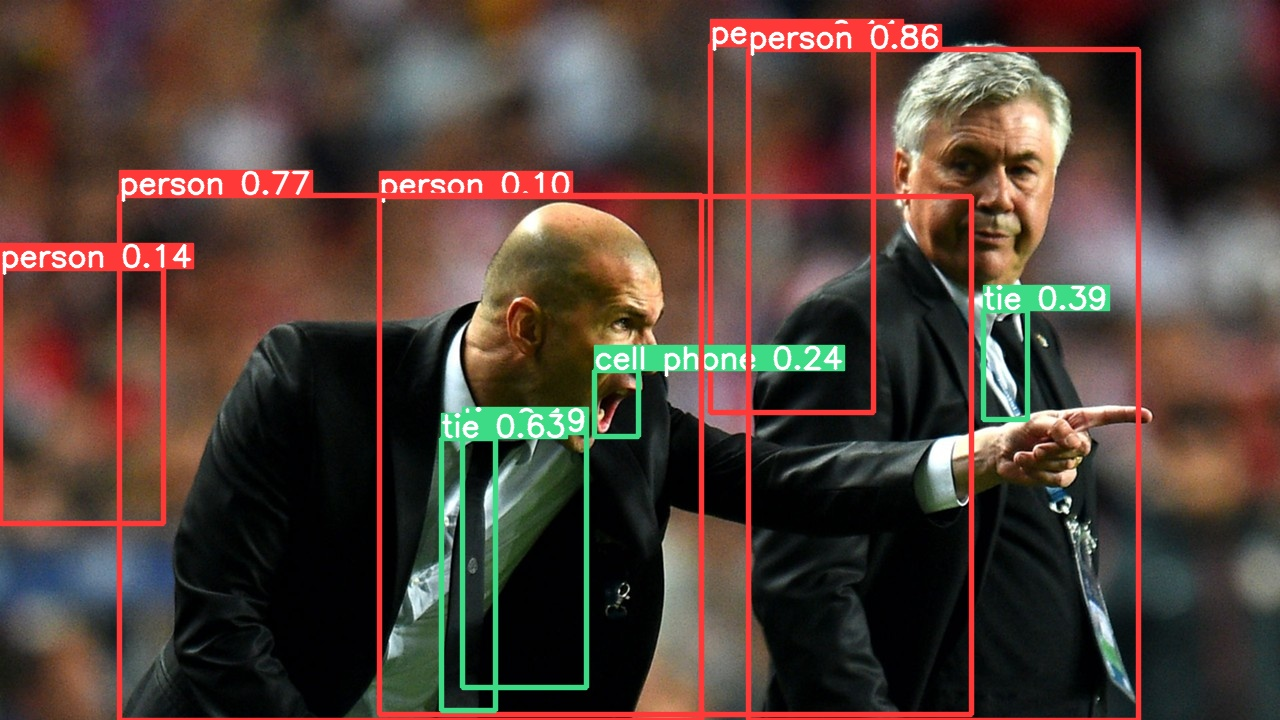

In [ ]:
display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.1 --source data/images/bus.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=data/images/bus.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-304-g22361691 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 1 tie, 363.9ms
Speed: 2.9ms pre-process, 363.9ms inference, 4.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


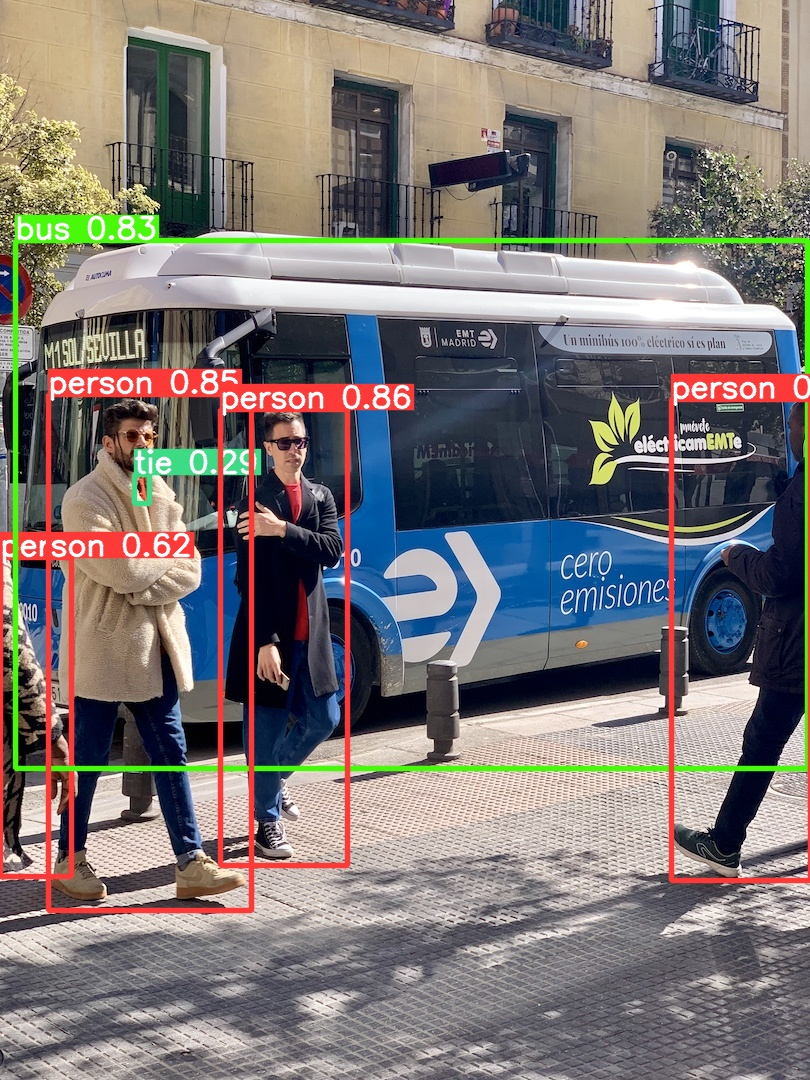

In [ ]:
display.Image(filename='runs/detect/exp2/bus.jpg', width=600)

In [ ]:
# prompt: test on downloaded images

# Run detection on downloaded images
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.1 --source /content/stopsign.jpeg


detect: weights=['runs/train/exp/weights/best.pt'], source=/content/stopsign.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-304-g22361691 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/stopsign.jpeg: 480x640 3 persons, 13 cars, 1 bus, 1 truck, 2 traffic lights, 1 stop sign, 2 backpacks, 401.6ms
Speed: 7.4ms pre-process, 401.6ms inference, 4.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


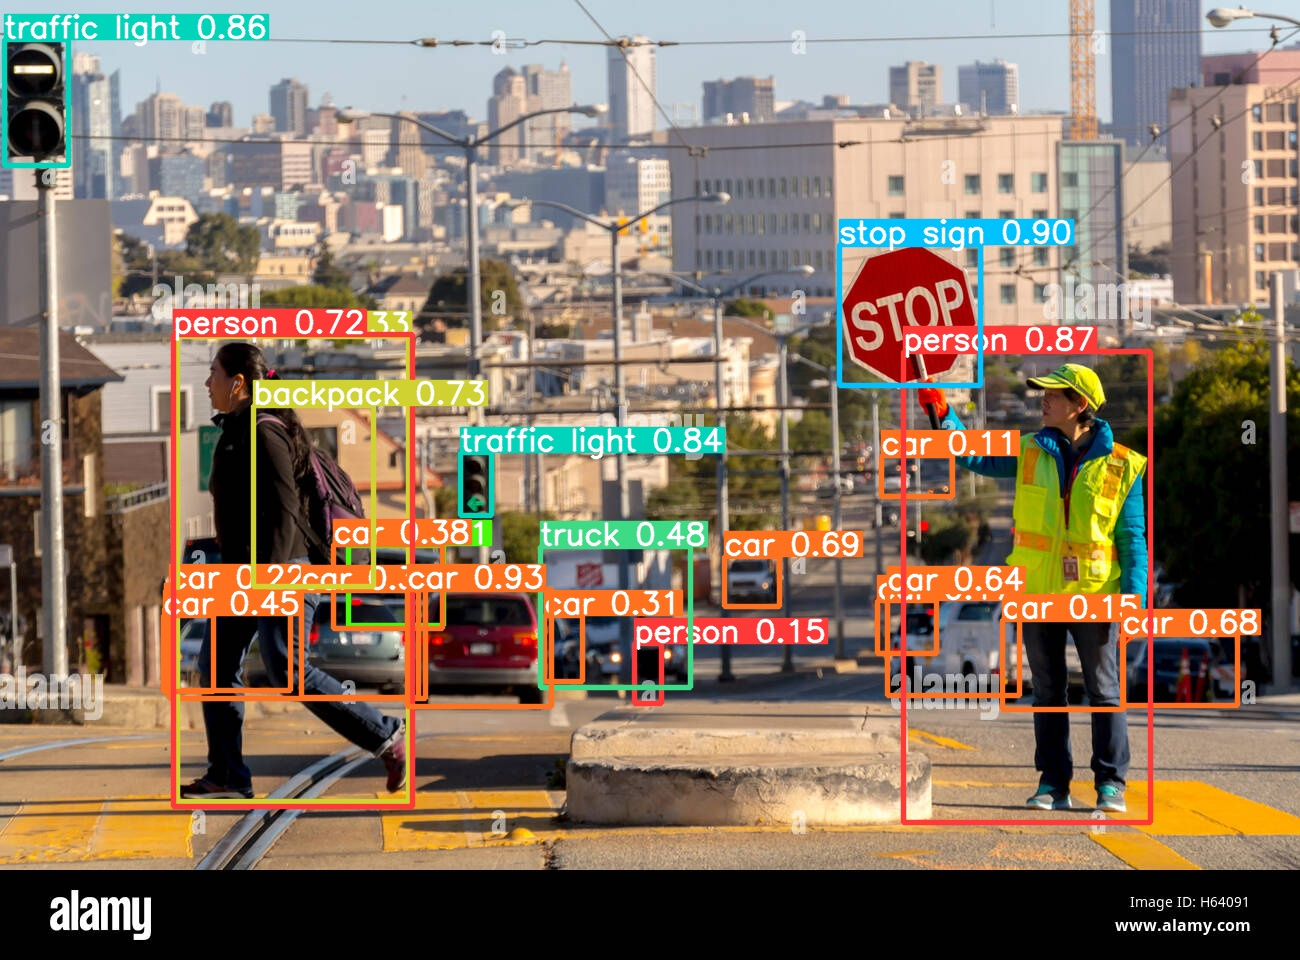

In [ ]:
display.Image(filename='runs/detect/exp4/stopsign.jpeg', width=600)

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.1 --source /content/bench.jpeg


detect: weights=['runs/train/exp/weights/best.pt'], source=/content/bench.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-304-g22361691 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/bench.jpeg: 448x640 4 persons, 1 car, 4 benchs, 2 chairs, 1 potted plant, 1 cell phone, 375.8ms
Speed: 4.9ms pre-process, 375.8ms inference, 4.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp5


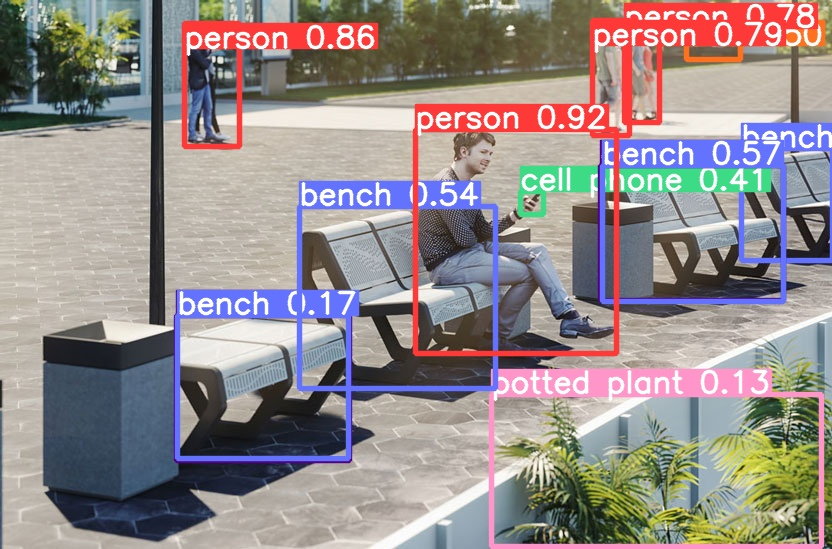

In [ ]:
display.Image(filename='runs/detect/exp5/bench.jpeg', width=600)



In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.1 --source /content/trafficlight.jpeg

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/trafficlight.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-304-g22361691 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/trafficlight.jpeg: 448x640 8 persons, 2 cars, 2 motorcycles, 2 buss, 2 trucks, 13 traffic lights, 1 horse, 1 cow, 1 suitcase, 326.9ms
Speed: 3.0ms pre-process, 326.9ms inference, 4.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp6


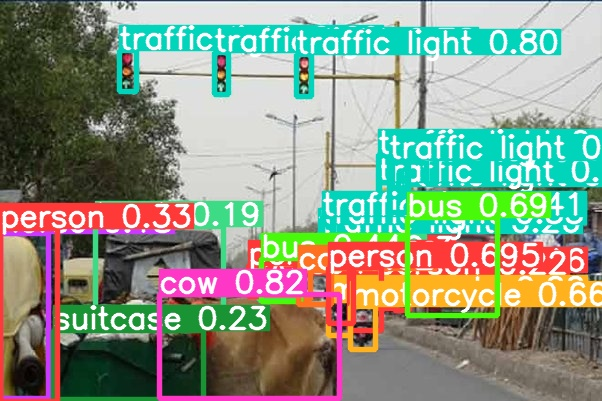

In [ ]:
display.Image(filename='runs/detect/exp6/trafficlight.jpeg', width=600)


In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.1 --source /content/chair.jpeg


detect: weights=['runs/train/exp/weights/best.pt'], source=/content/chair.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-304-g22361691 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/chair.jpeg: 384x640 5 persons, 1 skateboard, 1 bottle, 6 chairs, 1 dining table, 2 laptops, 1 cell phone, 305.9ms
Speed: 2.7ms pre-process, 305.9ms inference, 4.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp7


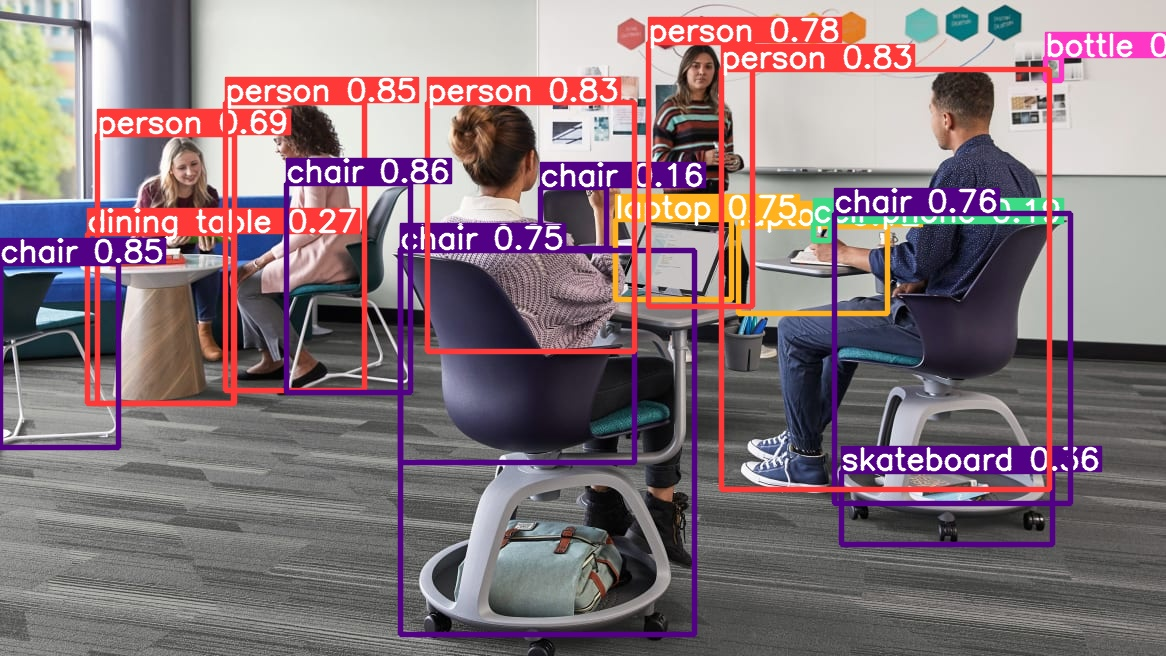

In [ ]:
display.Image(filename='runs/detect/exp7/chair.jpeg', width=600)


In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.1 --source /content/kitchen.jpeg


detect: weights=['runs/train/exp/weights/best.pt'], source=/content/kitchen.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-304-g22361691 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/kitchen.jpeg: 448x640 6 persons, 1 handbag, 2 cups, 2 knifes, 4 spoons, 11 bowls, 1 apple, 2 sandwichs, 1 hot dog, 1 chair, 1 dining table, 1 remote, 1 cell phone, 1 oven, 308.2ms
Speed: 3.3ms pre-process, 308.2ms inference, 1.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp8


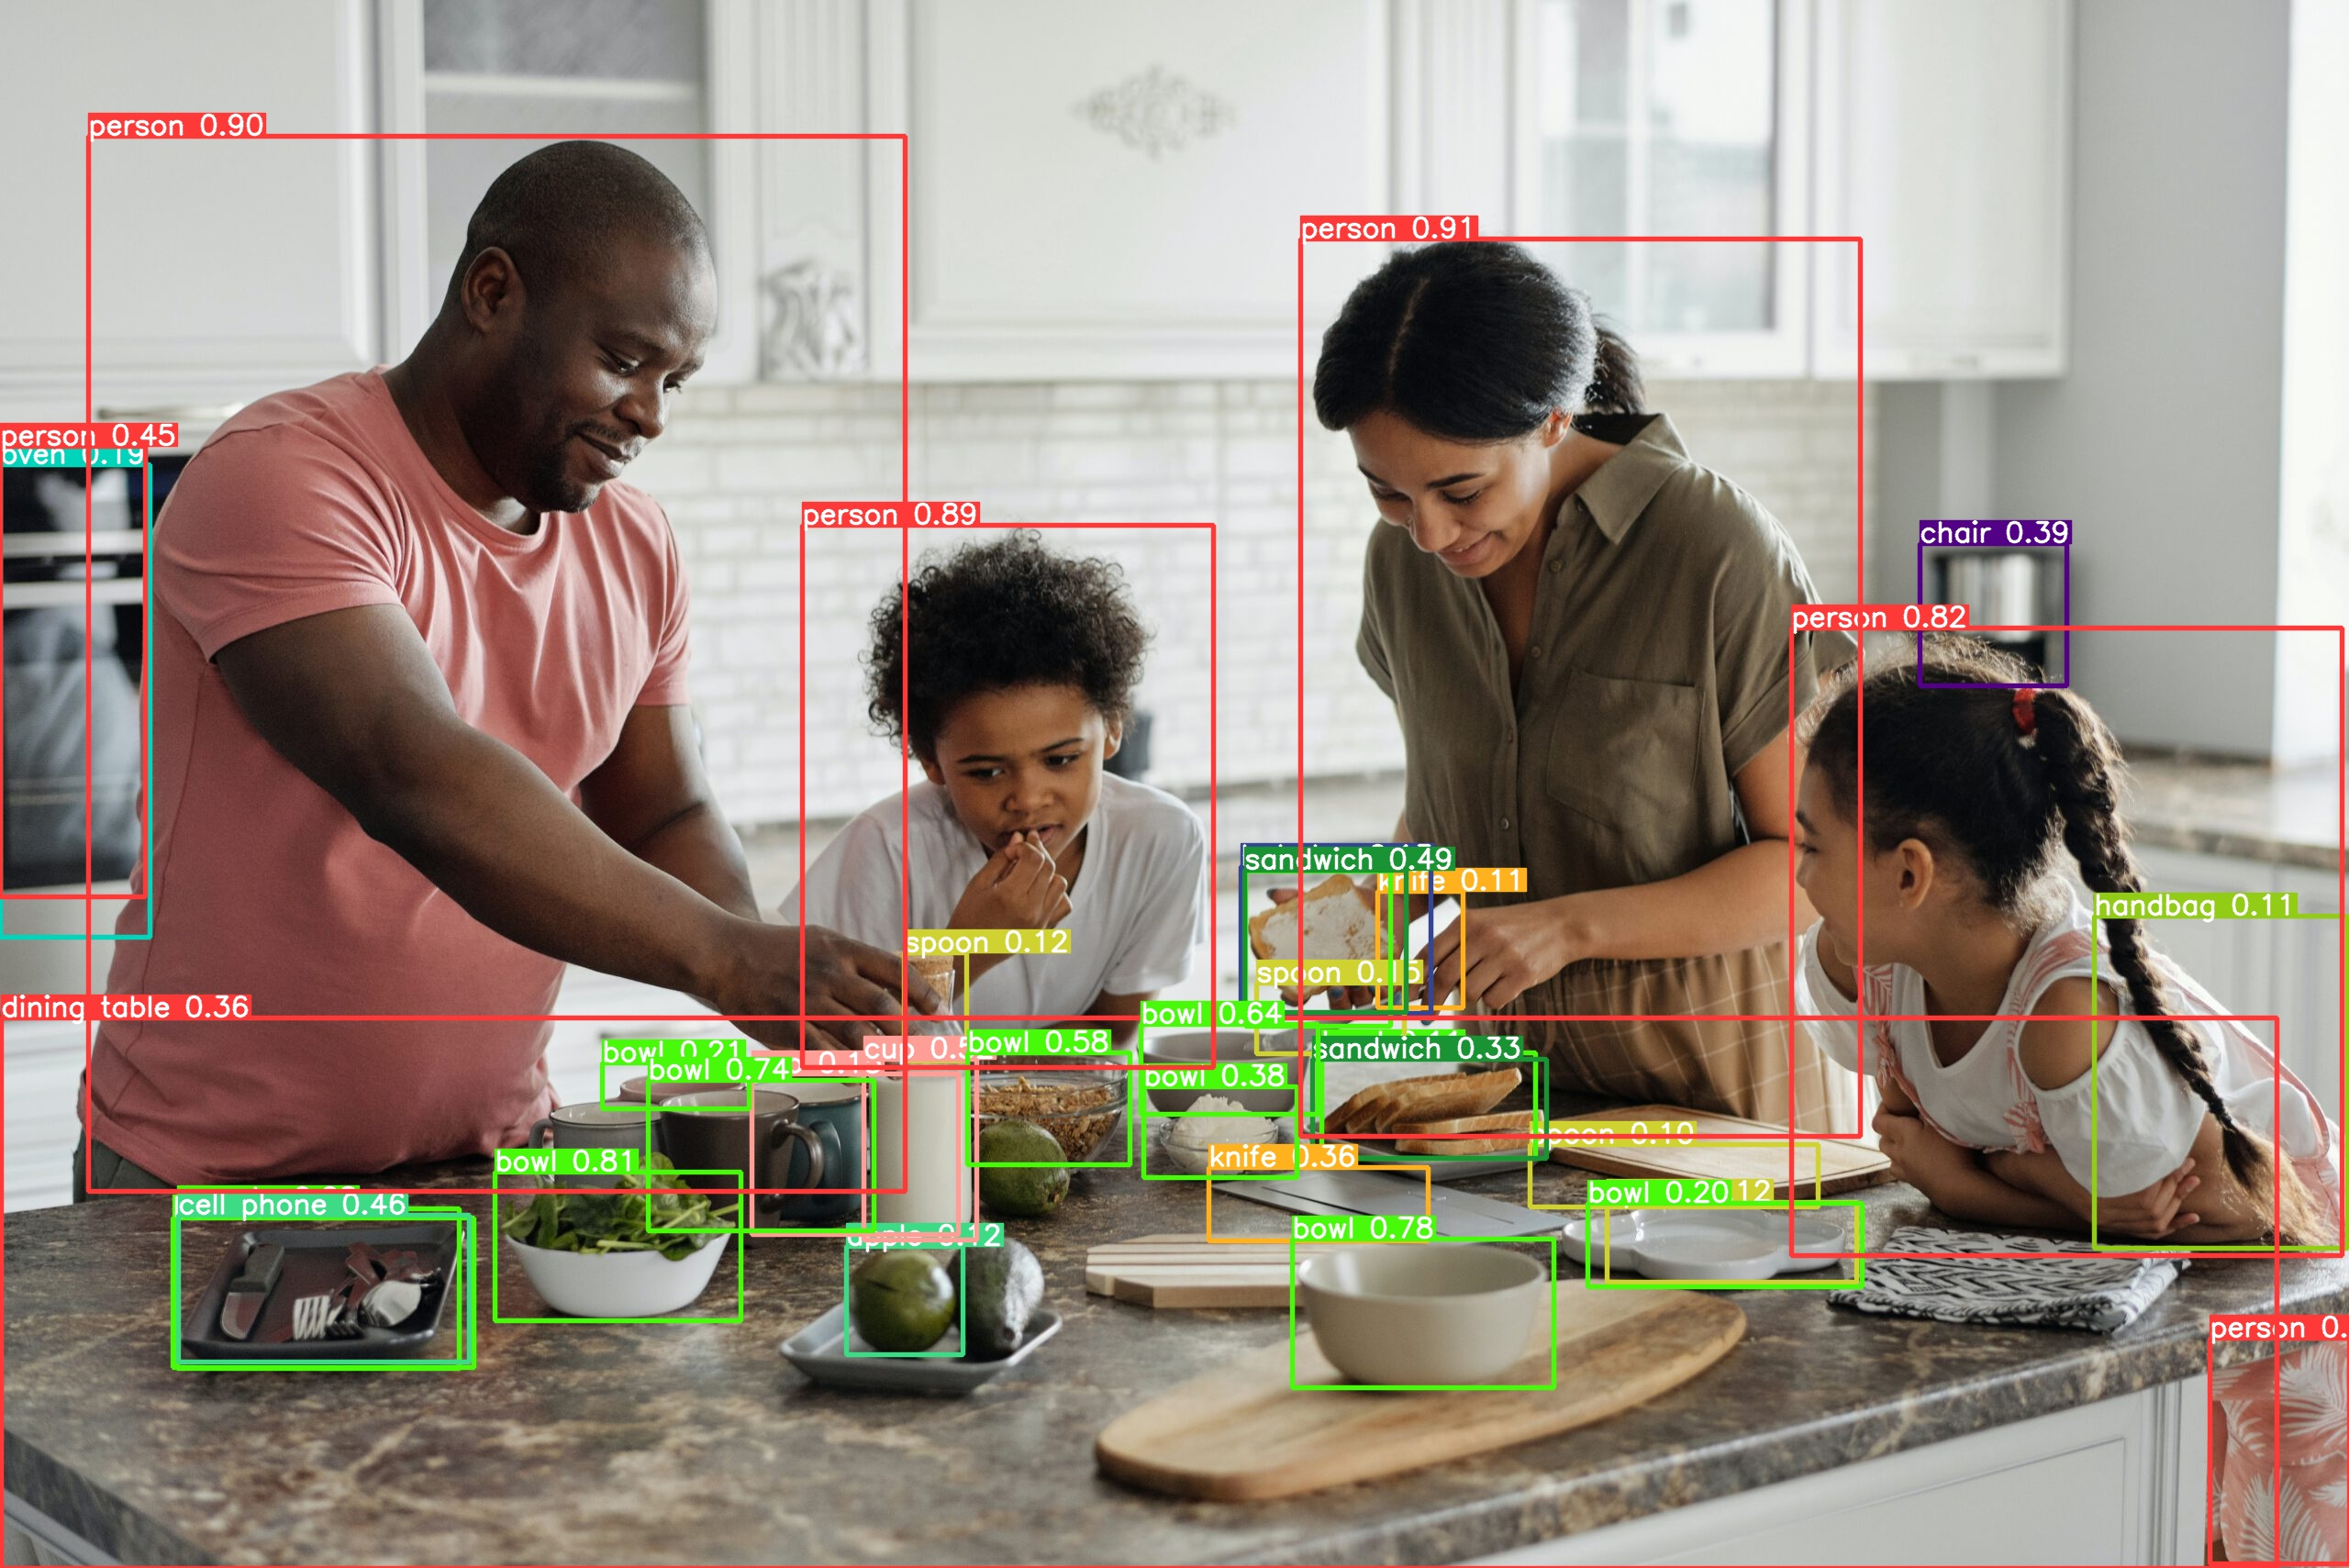

In [ ]:
display.Image(filename='runs/detect/exp8/kitchen.jpeg', width=600)


In [ ]:
def describe_scene(image_path, results):
    detected_objects = results.xyxy[0][:, :-1]
    labels = results.names[results.xyxy[0][:, -1].long()]

    description = f"I see {len(detected_objects)} objects in the scene. "
    for obj, label in zip(detected_objects, labels):
        description += f"A {label} is located at position ({obj[0]}, {obj[1]}) with width {obj[2] - obj[0]} and height {obj[3] - obj[1]}. "

    return description


In [ ]:
# Extracted objects from the output message
detected_objects = ["person", "handbag", "cup", "knife", "spoon", "bowl", "apple", "sandwich", "hot dog", "chair", "dining table", "remote", "cell phone", "oven"]

# Convert labels to text
detected_objects_text = ', '.join(detected_objects)

# Print the text representation of detected objects
print("Detected objects:", detected_objects_text)


Detected objects: person, handbag, cup, knife, spoon, bowl, apple, sandwich, hot dog, chair, dining table, remote, cell phone, oven


In [ ]:
# prompt: convert the above detected objects to audio

!pip install gtts



In [ ]:
from gtts import gTTS
from IPython.display import Audio

def text_to_speech(text, lang='en'):
    tts = gTTS(text=text, lang=lang)
    return tts

# Example usage
speech = text_to_speech("Hello, how are you?")
speech.save("output.mp3")  # Save speech as an MP3 file
Audio("output.mp3", autoplay=True)  # Play speech directly in the notebook



In [ ]:
# Parse the detection output message
detection_message = "image 1/1 /content/kitchen.jpeg: 448x640 6 persons, 1 handbag, 2 cups, 2 knifes, 4 spoons, 11 bowls, 1 apple, 2 sandwichs, 1 hot dog, 1 chair, 1 dining table, 1 remote, 1 cell phone, 1 oven, 407.3ms"

# Split the detection message into tokens
tokens = detection_message.split()

# Extract relevant information from the tokens
image_size = tokens[4]  # Size of the image (e.g., 448x640)
object_counts = tokens[5:-1]  # Counts of each detected object

# Create a list of detected objects and their counts
detected_objects = [f"{count} {object}" for count, object in zip(object_counts[::2], object_counts[1::2])]

# Generate the scene description
scene_description = f"The scene is {image_size} in size and contains {', '.join(detected_objects)}."
print("Scene description:", scene_description)


Scene description: The scene is 6 in size and contains persons, 1, handbag, 2, cups, 2, knifes, 4, spoons, 11, bowls, 1, apple, 2, sandwichs, 1, hot dog,, 1 chair,, 1 dining, table, 1, remote, 1, cell phone,, 1 oven,.


In [ ]:
speech = gTTS(text=detected_objects_text, lang='en')

# Save speech as an MP3 file
speech.save("detected_objects.mp3")

# Play speech directly in the notebook
Audio("detected_objects.mp3", autoplay=True)

In [ ]:
# prompt: change command to run in collar $ python yolo_video.py --input videos/car_chase_03.mp4 \
# 	--output output/car_chase_03.avi --yolo yolo-coco

!python yolo_video.py --input /content/Los Angeles Police Chase 10__11_2018 - Reckless Driver Stolen Car Pursuit.mp4 \
    --output output/car_chase_03.avi \
    --yolo yolo-coco

python3: can't open file '/content/yolov5/yolo_video.py': [Errno 2] No such file or directory


In [ ]:
!pip install pytesseract


In [ ]:
import pytesseract
from PIL import Image

# Load the image
image_path = '/content/Text.jpeg'
image = Image.open(image_path)

# Use pytesseract to extract text
extracted_text = pytesseract.image_to_string(image)

# Print the extracted text
print(extracted_text)


1107) |
STEALERS =»

 



In [ ]:
!apt-get install tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,894 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-